<a href="https://colab.research.google.com/github/vicpon/udemy-ai/blob/main/Hands_on_Exercise_Data_Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Pre-Processing for Machine Learning Projects**

In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2: Load the dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we can see from the above info that the our dataset has 9 columns and each columns has 768 values. There is no Null values in the dataset.

We can also check the null values using df.isnull()



In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Step 3: Statistical Analysis**

In statistical analysis, first, we use the df.describe() which will give a descriptive overview of the dataset.



In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The above table shows the count, mean, standard deviation, min, 25%, 50%, 75%, and max values for each column. When we carefully observe the table we will find that. Insulin, Pregnancies, BMI, BloodPressure columns has outliers.

Let’s plot the boxplot for each column for easy understanding.

**Step 4: Check the outliers**

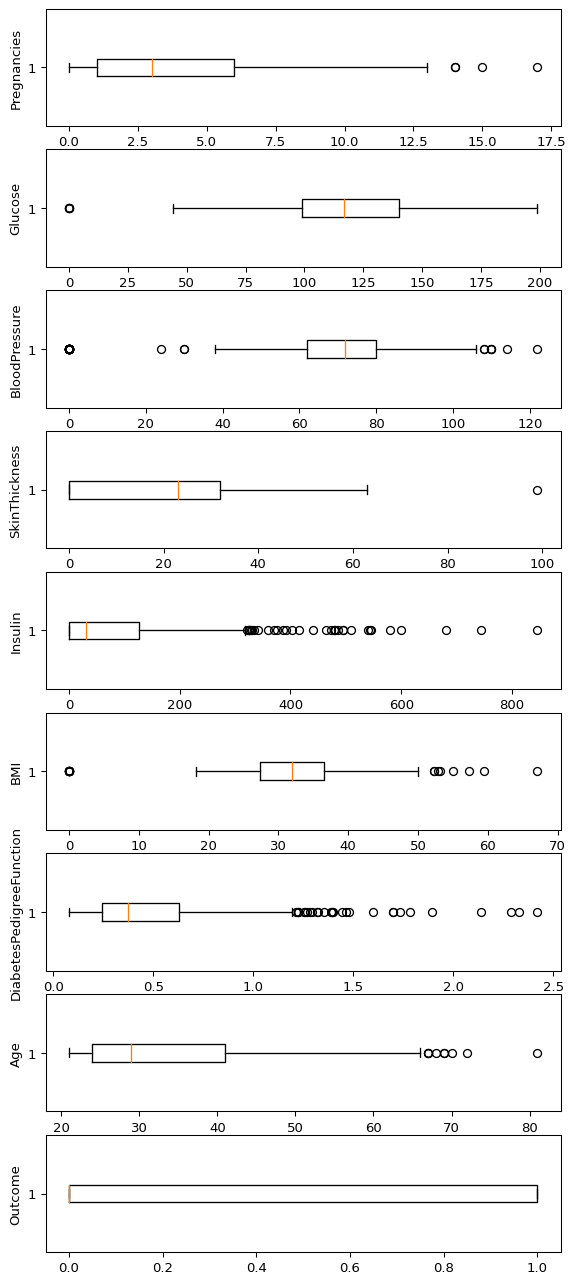

In [ ]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

from the above boxplot, we can clearly see that all most every column has some amounts of outliers.

**Drop the outliers**

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound)
				& (df['Insulin'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound)
						& (clean_data['Pregnancies'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound)
						& (clean_data['Age'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound)
						& (clean_data['Glucose'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound)
						& (clean_data['BloodPressure'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound)
						& (clean_data['BMI'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound)
						& (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]


**Step 5: Correlation**

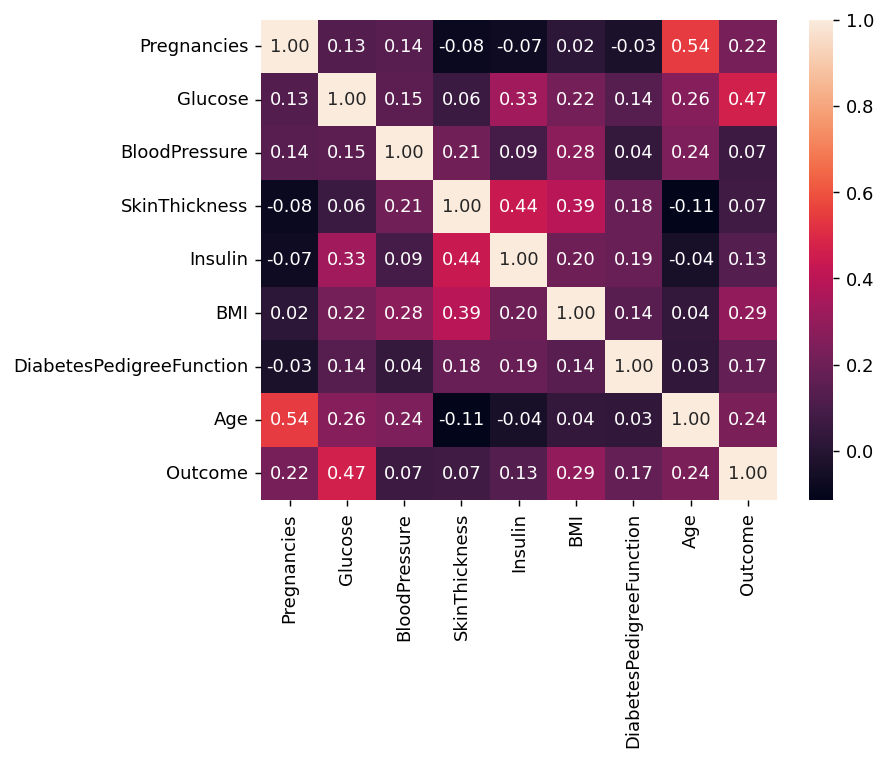

In [ ]:
#correlation
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

We can also camapare by single columns in descending order

In [ ]:
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

**Check Outcomes Proportionality**

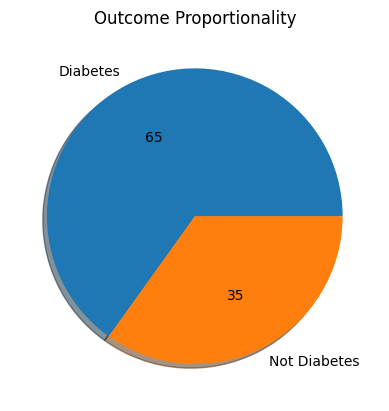

In [ ]:
plt.pie(df.Outcome.value_counts(),
        labels= ['Diabetes', 'Not Diabetes'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

**Step 6: Separate independent features and Target Variables**

In [ ]:
# separate array into input and output components
X = df.drop(columns =['Outcome'])
Y = df.Outcome

**Step 7: Normalization or Standardization**

**Normalization**

MinMaxScaler scales the data so that each feature is in the range [0, 1].
It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.
Rescale your data using scikit-learn using the MinMaxScaler.

In [ ]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX[:5]

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.44723618, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.68844221, 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

**Standardization**

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.
We can standardize data using scikit-learn with the StandardScaler class.
It works well when the features have a normal distribution or when the algorithm being used is not sensitive to the scale of the features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
rescaledX[:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])